In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
# File to Load (Remember to change these)
city_data_to_load = "Downloads/city_data.csv"
ride_data_to_load = "Downloads/ride_data.csv"

In [4]:
city_df= pd.read_csv(city_data_to_load)
ride_df= pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_df, city_df, on="city")
del merge_table['date']
merge_table.head()


,city,fare,ride_id,driver_count,type
0,Lake Jonathanshire,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,13.89,424254840012,5,Urban


In [6]:
city_group = merge_table.groupby(["city", "type"])

ave_fare_price = round(city_group["fare"].mean(),2)
rides_per_city = city_group["ride_id"].count()
drivers_per_city = city_group["driver_count"].mean()

rides_df =pd.DataFrame({"Ave Fare Price": ave_fare_price,"Rides Per City":rides_per_city,"Driver Per City":drivers_per_city})

rides_df.head()



,,Ave Fare Price,Rides Per City,Driver Per City
city,type,,,
Amandaburgh,Urban,24.64,18,12
Barajasview,Urban,25.33,22,26
Barronchester,Suburban,36.42,16,11
Bethanyland,Suburban,32.96,18,22
Bradshawfurt,Rural,40.06,10,7


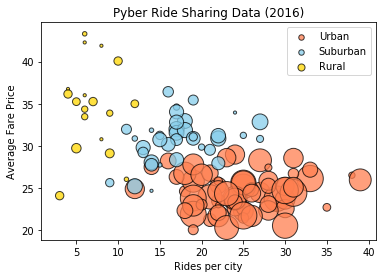

In [7]:
city = rides_df.groupby("type").get_group("Urban")
plt.scatter(city["Rides Per City"], city["Ave Fare Price"], s = city["Driver Per City"]*10, color = "coral", edgecolor="black", alpha = 0.75, marker="o")
city = rides_df.groupby("type").get_group("Suburban")
plt.scatter(city["Rides Per City"], city["Ave Fare Price"], s = city["Driver Per City"]*10,  color = "skyblue", edgecolor="black", alpha = 0.75, marker="o")
city = rides_df.groupby("type").get_group("Rural")
plt.scatter(city["Rides Per City"], city["Ave Fare Price"], s = city["Driver Per City"]*10, color = "gold", edgecolor="black", alpha = 0.75, marker="o")

plt.xlabel('Rides per city')
plt.ylabel('Average Fare Price')
plt.title('Pyber Ride Sharing Data (2016)')

type_gr =merge_table.groupby('type')
type_list= type_gr.groups.keys()
type_list

lgnd = plt.legend(('Urban', 'Suburban', 'Rural') ,loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.show()

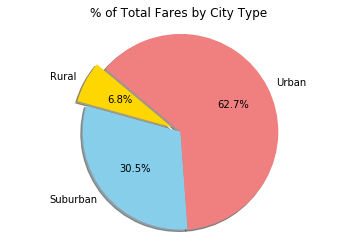

In [8]:
type_percent = merge_table.groupby("type").sum()["fare"] /merge_table["fare"].sum() * 100
type_percent
labels = 'Rural', 'Suburban', 'Urban'
# sizes = [type_percent]
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(type_percent, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show()

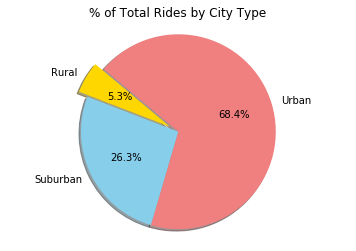

In [9]:

Rides_percent = merge_table.groupby("type").count()["ride_id"] /merge_table["ride_id"].count() * 100
Rides_percent

labels = 'Rural', 'Suburban', 'Urban'
# sizes = [Rides_percent]
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(Rides_percent, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')
plt.axis('equal')

plt.show()

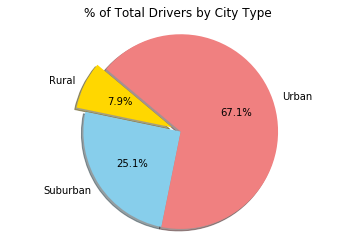

In [15]:


Driver_percent = merge_table.groupby("type").mean()["driver_count"] /merge_table["driver_count"].mean() * 100
Driver_percent

labels = 'Rural', 'Suburban', 'Urban'
# sizes = [Rides_percent]
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(Driver_percent, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('% of Total Drivers by City Type')
plt.show()